# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [642]:
# use these links to do so:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("E:/insaid/Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [108]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [109]:
#summary of the given dataset before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [408]:
#after cleaning the dataset and these are the variables which i will be using for the model making purpose.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
gender              7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
Churn               7043 non-null int64
dtypes: int64(15)
memory usage: 825.4 KB


In [409]:
#describing the dataset 
data.describe()

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.495244,32.371149,1.096834,1.674996,1.872923,1.930001,1.871788,1.872781,1.926452,1.832316,1.828766,1.690473,1.407781,2.315633,1.734630
std,0.500013,24.559481,0.295752,0.642730,0.737796,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.833755,0.491457,1.148907,0.441561
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,29.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,2.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
max,2.000000,72.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,2.000000


### Data Manipulation

In [643]:
#Converting categorical variables into numerical
data.Churn = data.Churn.replace(['Yes','No'],[1,2])
data.gender = data.gender.replace(['Male','Female'],[1,2])
data.Dependents = data.Dependents.replace(['Yes','No'],[1,2])
data.Partner = data.Partner.replace(['Yes','No'],[1,2])

In [644]:
data.TechSupport = data.TechSupport.replace(['Yes','No','No internet service'],[1,2,3])
data.StreamingTV = data.StreamingTV.replace(['Yes','No','No internet service'],[1,2,3])
data.StreamingMovies = data.StreamingMovies.replace(['Yes','No','No internet service'],[1,2,3])
data.Contract = data.Contract.replace(['Month-to-month','One year','Two year'],[1,2,3])
data.PaperlessBilling = data.PaperlessBilling.replace(['Yes','No'],[1,2])
data.PaymentMethod = data.PaymentMethod.replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[1,2,3,4])

In [645]:
data.PhoneService = data.PhoneService.replace(['Yes','No'],[1,2])
data.MultipleLines = data.MultipleLines.replace(['Yes','No','No phone service'],[1,2,3])
data.InternetService = data.InternetService.replace(['DSL','Fiber optic','No'],[1,2,3])
data.OnlineSecurity = data.OnlineSecurity.replace(['Yes','No','No internet service'],[1,2,3])
data.OnlineBackup = data.OnlineBackup.replace(['Yes','No','No internet service'],[1,2,3])
data.DeviceProtection = data.DeviceProtection.replace(['Yes','No','No internet service'],[1,2,3])

In [541]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
#x = data['tenure'].values.reshape(-1, 1) #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#data['tenure'] = x_scaled

C:\Users\JalaJ\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Data Visualization

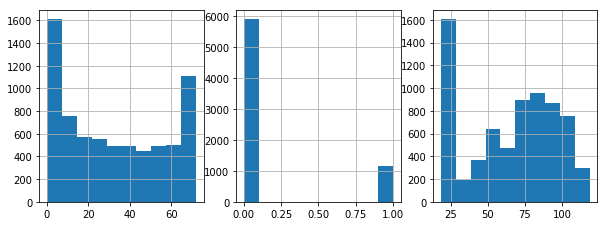

In [15]:
#A quick look on the numerical variables by using the histogram
plt.subplot(331)
data['tenure'].hist(figsize=(10,12))

plt.subplot(332)
data['SeniorCitizen'].hist(figsize=(10,12))

plt.subplot(333)
data['MonthlyCharges'].hist(figsize=(10,12))

In [16]:
categorical = data.select_dtypes(include=['object'])

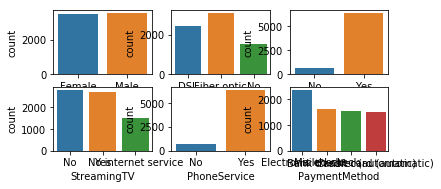

In [410]:
#A quick look on some categorical variables using the countplot 
import seaborn as sns

plt.subplot(331)
sns.countplot(data=categorical,x = 'gender')

plt.subplot(332)
sns.countplot(data=categorical,x = 'InternetService')

plt.subplot(333)
sns.countplot(data=categorical,x = 'PhoneService')

plt.subplot(334)
sns.countplot(data=categorical,x = 'StreamingTV')

plt.subplot(335)
sns.countplot(data=categorical,x = 'PhoneService')

plt.subplot(336)
sns.countplot(data=categorical,x = 'PaymentMethod')

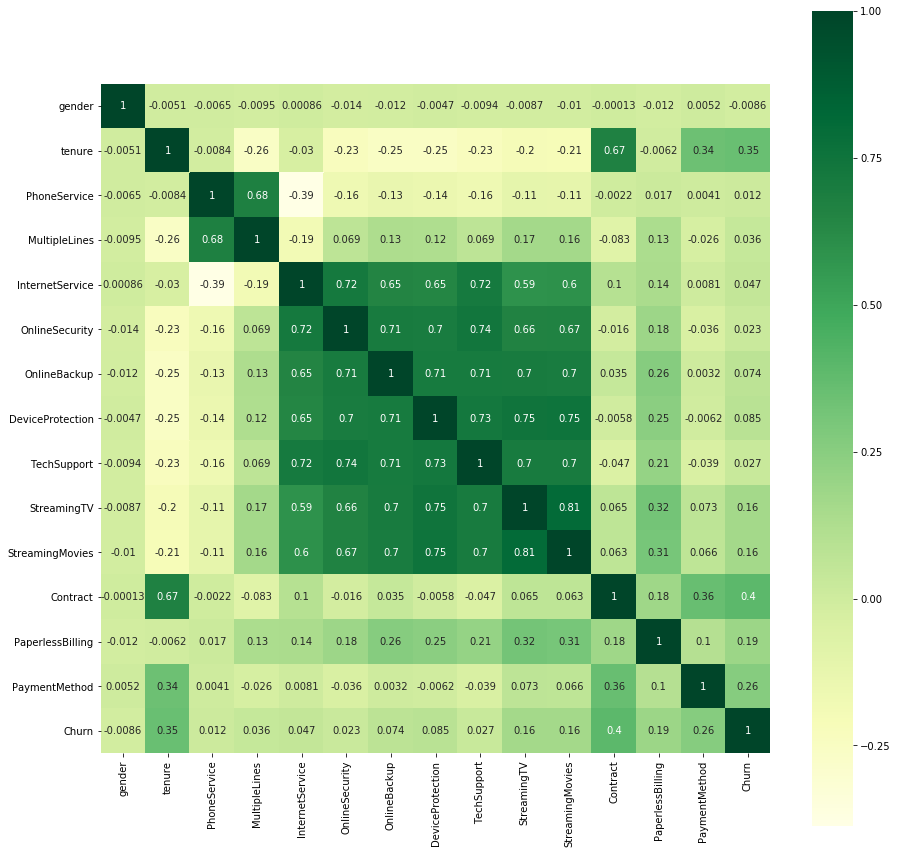

In [411]:
#finding correlation between vaiables for choosing them into the model using the heatmap.
corr = data.corr()
f,ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn",square= True,ax=ax,annot=True)

In [1]:
### Conclusion: What all did you understand from the above charts
#after calculating the correlation of different variables with each other, found out that SeniorCitizen, Partner, 
#Dependents, Monthlycharges, TotalCharges, CustomerId have nothing to do with the churn variable, so i will be dropping them.

### Implement Machine Learning Models

In [646]:
data = data.drop(['customerID','SeniorCitizen','Partner','Dependents','TotalCharges','MonthlyCharges','PhoneService'],axis=1)

In [647]:
#dividing the dataset for calibration and validation purpose
xtrain = data.iloc[0:4000,0:13]
ytrain = data.iloc[0:4000,13]
xtest = data.iloc[4000:,0:13]
ytest = data.iloc[4000:,13]

In [648]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [653]:
clf1 = RandomForestClassifier(n_estimators=200, 
                            bootstrap = True,
                            max_features = 'sqrt',
                            min_samples_leaf=1,
                            n_jobs = -1,
                            random_state=50)

clf1.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

### Model Evaluation

In [654]:
#Accuracy scores of the classifier used

In [655]:
from sklearn.metrics import accuracy_score

In [656]:
pred1= clf1.predict(xtrain)
print(accuracy_score(ytrain, pred1))

pred1 = clf1.predict(xtest)
print(accuracy_score(ytest, pred1))

0.97375
0.7817942819585935


### Final Conclusions

In [ ]:
#classifier made above is
#Random Forest which has very good accuracy on training set and an accuracy of around 79 % on test set 
#after tuning the attributes according to their effect on Churn attribute. 